# Title : Clustering and Fitting

# Name:DharmendraKumar Reddy Rayapureddy

# Student_ID: 23084698

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [155]:
data= pd.read_csv("C:\\Users\\dharm\\Desktop\\athlete_events.csv") #load the data

In [156]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [157]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [158]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [175]:
from scipy.stats import skew, kurtosis
skewness = data["Age"].skew()
kurtosis = data["Age"].kurtosis()
correlation = data["Weight"].corr(data["Age"])

In [176]:
skewness

1.747122537787137

In [177]:
kurtosis

0.21206886474817574

In [178]:
correlation

0.21206886474817574

In [179]:
skewness = data["Height"].skew()
kurtosis = data["Height"].kurtosis()
correlation = data["Height"].corr(data["Age"])

In [180]:
skewness

0.018477298234269277

In [181]:
kurtosis

0.17772797474523294

In [182]:
correlation

0.1382464707283882

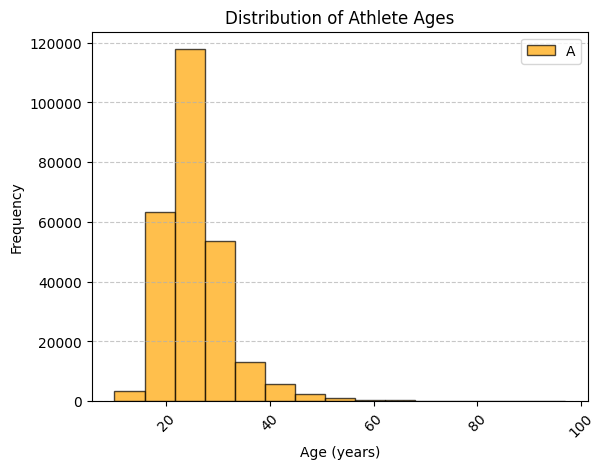

In [159]:

def plot_histogram(data, column, bins, title, xlabel, ylabel):
    plt.hist(data[column], bins=bins, edgecolor='black', alpha=0.7,color = "orange")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 45)
    plt.legend("Age")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_histogram(data, column='Age', bins=15, title='Distribution of Athlete Ages',
               xlabel='Age (years)', ylabel='Frequency')


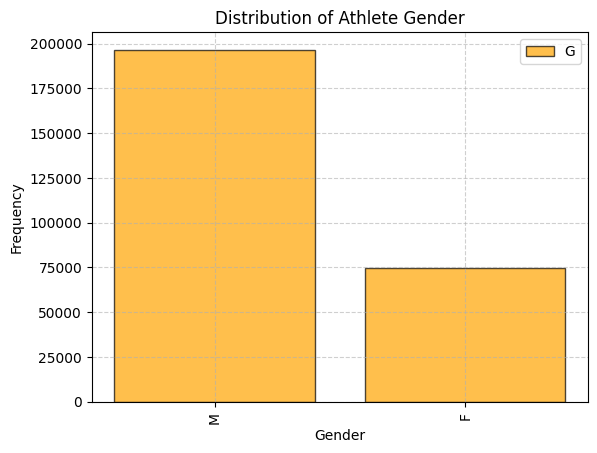

In [160]:
import matplotlib.pyplot as plt

def plot_bar_chart(data, column, title, xlabel, ylabel):
    counts = data[column].value_counts()
    plt.bar(counts.index, counts.values, alpha=0.7, edgecolor='black',color = "orange")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend("Gender")
    plt.show()


plot_bar_chart(data, column='Sex', title='Distribution of Athlete Gender',
               xlabel='Gender', ylabel='Frequency')


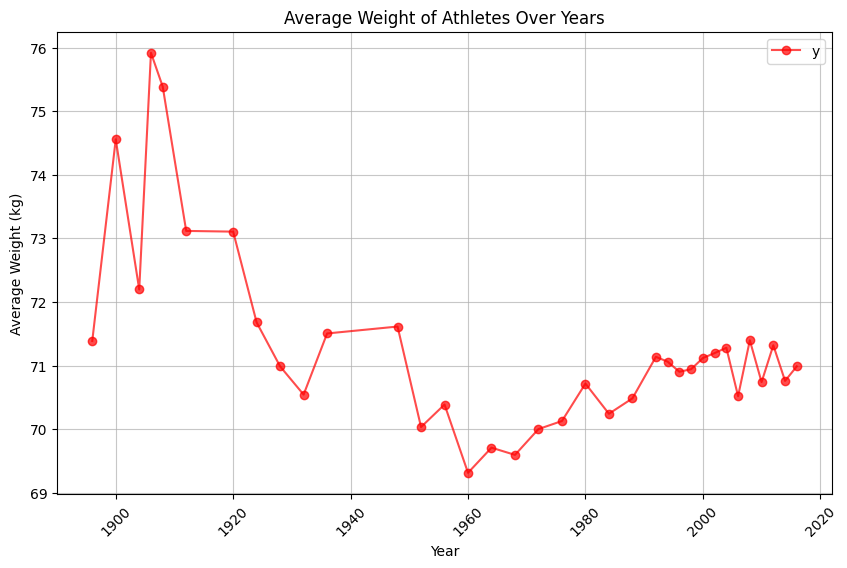

In [161]:

def plot_line(data, x_column, y_column, title, xlabel, ylabel):
    
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column], marker='o', linestyle='-', alpha=0.7,color = "red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 45)
    plt.grid(alpha=0.7)
    plt.legend("year vs avg weight",loc = "upper right")
    plt.show()

average_weight_per_year = data.groupby('Year')['Weight'].mean().reset_index()
plot_line(average_weight_per_year, x_column='Year', y_column='Weight',
          title='Average Weight of Athletes Over Years', xlabel='Year', ylabel='Average Weight (kg)')


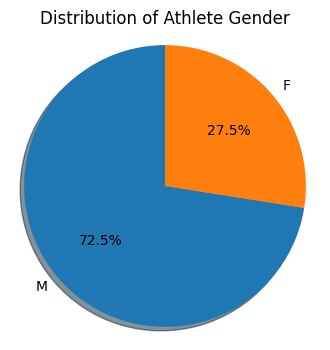

In [162]:

def plot_pie_chart(data, column, title):
    counts = data[column].value_counts()
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title(title)
    plt.axis('equal')  
    plt.show()

plot_pie_chart(data, column='Sex', title='Distribution of Athlete Gender')


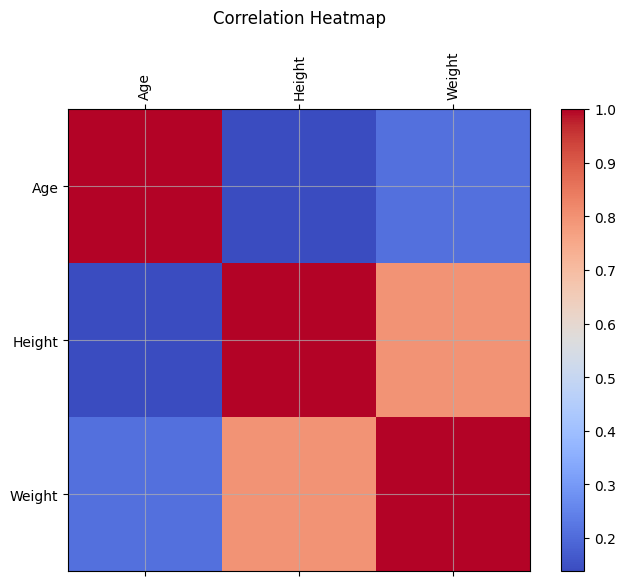

In [169]:

numerical_columns = ['Age', 'Height', 'Weight']  
correlation_matrix = data[numerical_columns].corr()


def plot_heatmap(correlation_matrix, title, columns):
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar(cax)
    plt.title(title, pad=20)
    plt.xticks(range(len(columns)), columns, rotation=90)
    plt.yticks(range(len(columns)), columns)
    plt.grid(alpha=0.7)
    plt.show()

plot_heatmap(correlation_matrix, title='Correlation Heatmap', columns=correlation_matrix.columns)


In [ ]:

numerical_data = data[['Age', 'Height', 'Weight']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
numerical_data['Cluster'] = kmeans.fit_predict(scaled_data)


def plot_clusters(data, x_col, y_col, cluster_col, centroids, title, xlabel, ylabel):
    plt.scatter(data[x_col], data[y_col], c=data[cluster_col], cmap='viridis', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

plot_clusters(numerical_data, x_col='Age', y_col='Weight', cluster_col='Cluster',
              centroids=kmeans.cluster_centers_[:, [0, 2]],
              title='Clusters: Age vs Weight', xlabel='Age (years)', ylabel='Weight (kg)')



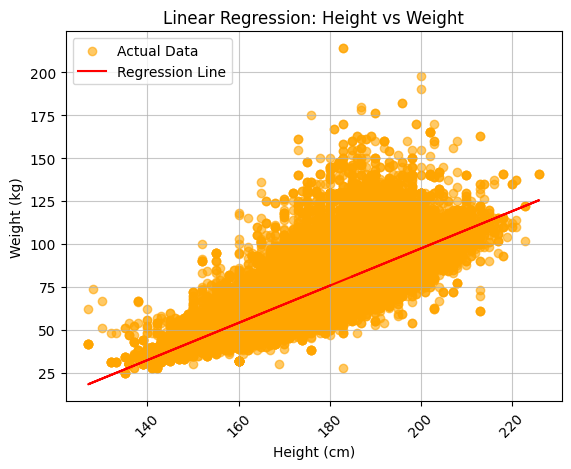

In [164]:
X = numerical_data[['Height']]
y = numerical_data['Weight']

lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)

def plot_regression_line(X, y, predictions, title, xlabel, ylabel):
    plt.scatter(X, y, alpha=0.6, label='Actual Data',color = "orange")
    plt.plot(X, predictions, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

plot_regression_line(X, y, predictions, title='Linear Regression: Height vs Weight',
                     xlabel='Height (cm)', ylabel='Weight (kg)')


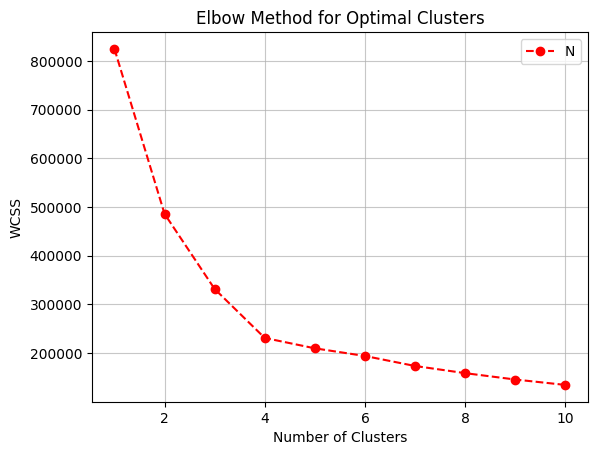

In [165]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

def plot_elbow_method(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--',color = "red")
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.grid(alpha=0.7)
    plt.legend("Number of clusters")
    plt.show()

# Plot Elbow Method
plot_elbow_method(scaled_data)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
numerical_data['Cluster'] = kmeans.fit_predict(scaled_data)
